In [ ]:
import gdown
gdown.download_folder('https://drive.google.com/drive/folders/1H8ZMp2fR_scNwS9tptSIuV-MeUz_Lbg2', quiet=True)

['/content/402204306-hw2-resources/BPE_tokenizer_5000.pkl',
 '/content/402204306-hw2-resources/BPE_tokenizer_20000.pkl',
 '/content/402204306-hw2-resources/tokenized_1M_sentences_BPE_20K.pkl']

# Prepare Data

## Download dataset

In [ ]:
dataset_path = '/kaggle/input/persian-wikipedia-dataset/Persian-WikiText-1.txt'

# # ____ Uncomment these lines if runing on colab ____
# !mkdir ~/.kaggle
# !cp ./kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download miladfa7/persian-wikipedia-dataset -f Persian-WikiText-1.txt
# !unzip Persian-WikiText-1.txt.zip
# dataset_path = 'Persian-WikiText-1.txt'

with open(dataset_path, 'r') as file:
    corpus = file.read()

print(corpus[:2000])

عنوان مقاله: صفحهٔ اصلی

<templatestyles src="صفحه اصلی/



عنوان مقاله: ویکی پدیا

ویکی پدیا (کوته نوشت به صورت «وپ» و «WP») یک دانشنامه برخط چندزبانه مبتنی بر وب با محتوای آزاد و همکاری باز است که با همکاری افراد داوطلب نوشته می شود و هر کسی که به اینترنت و وب دسترسی داشته باشد می تواند مقالات آن را ببیند و ویرایش کند. نام ویکی پدیا واژه ای ترکیبی است که از واژه های ویکی (وبگاه مشارکتی) و اِنسایکلوپدیا (Encyclopedia) (دانشنامه یا دائرةالمعارف) گرفته شده است. هدف ویکی پدیا آفرینش و انتشار جهانی یک دانشنامه با محتوای آزاد به تمامی زبان های زندهٔ دنیا است.

ویکی پدیای انگلیسی در تاریخ ۱۵ ژانویه ۲۰۰۱ (۲۶ دی ۱۳۷۹) به صورت مکملی برای دانشنامهٔ تخصصی نیوپدیا نوشته شد. بنیان گذاران آن «جیمی ویلز» و «لری سنگر» هستند. هم اکنون بنیاد غیرانتفاعی ویکی مدیا پروژهٔ ویکی پدیا را پشتیبانی می کند. میزبان های اینترنتی اصلی این وبگاه در شهر تامپای فلوریدا هستند. همچنین میزبان های اضافی دیگری هم در شهرهای آمستردام و سئول به این وبگاه یاری می رسانند.

"ویکی پدیا" از پایان آوریل ۲۰۰۷ تا اکتبر ۲۰۱۹، یکی از 

## Pre-processing

In [ ]:
import re

stop_chars = ['\u200c', '"', "'", '#', '(', ')', '*', ',', '-', '_', '~', '/', '\\', '|', ':', '[', ']', '«', '»', '<', '>', '،', '٫', '؛', '؟', '%', '٪', '…', '$', '&', '@', '=', '+', '`','۰', '۱', '۲', '۳', '۴', '۵', '۶', '۷', '۸', '۹', 'ْ', 'ٌ', 'ٍ', 'ً', 'ُ', 'ِ', 'َ', 'ّ', 'ء', 'ٔ', 'ٰ', '﷼']
stop_words = ['عنوان مقاله:']


# remove stop words
print('removing stop words...')
pattern = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*')
corpus_prep = pattern.sub(' ', corpus)

# remove HTML tags
corpus_prep = re.sub(r'<.*?>' , '', corpus_prep)

# remove stop_chars
print('removing stop chars...')
for ch in stop_chars:
  corpus_prep = corpus_prep.replace(ch, '')

# remove english alphabets
print('removing english alphabets...')
corpus_prep = re.sub(r'[a-zA-Z]', '', corpus_prep)

# remove white spaces
print('removing white spaces...')
corpus_prep = re.sub(r'[ \t\r\f\v]+', ' ', corpus_prep)

print(corpus_prep[:2000])

removing stop words...
removing stop chars...
removing english alphabets...
removing white spaces...
عنوان مقاله صفحه اصلی

 صفحه اصلی



عنوان مقاله ویکی پدیا

ویکی پدیا کوته نوشت به صورت وپ و یک دانشنامه برخط چندزبانه مبتنی بر وب با محتوای آزاد و همکاری باز است که با همکاری افراد داوطلب نوشته می شود و هر کسی که به اینترنت و وب دسترسی داشته باشد می تواند مقالات آن را ببیند و ویرایش کند. نام ویکی پدیا واژه ای ترکیبی است که از واژه های ویکی وبگاه مشارکتی و انسایکلوپدیا دانشنامه یا دائرةالمعارف گرفته شده است. هدف ویکی پدیا آفرینش و انتشار جهانی یک دانشنامه با محتوای آزاد به تمامی زبان های زنده دنیا است.

ویکی پدیای انگلیسی در تاریخ ژانویه دی به صورت مکملی برای دانشنامه تخصصی نیوپدیا نوشته شد. بنیان گذاران آن جیمی ویلز و لری سنگر هستند. هم اکنون بنیاد غیرانتفاعی ویکی مدیا پروژه ویکی پدیا را پشتیبانی می کند. میزبان های اینترنتی اصلی این وبگاه در شهر تامپای فلوریدا هستند. همچنین میزبان های اضافی دیگری هم در شهرهای آمستردام و سئول به این وبگاه یاری می رسانند.

ویکی پدیا از پایان آوریل تا اکت

In [ ]:
sentences = []

for line in corpus_prep.split('\n'):
  if len(line) > 20:  # ignore short lines
    sentences.append(line)

sentences[:5]

['عنوان مقاله صفحه اصلی',
 'عنوان مقاله ویکی پدیا',
 'ویکی پدیا کوته نوشت به صورت وپ و یک دانشنامه برخط چندزبانه مبتنی بر وب با محتوای آزاد و همکاری باز است که با همکاری افراد داوطلب نوشته می شود و هر کسی که به اینترنت و وب دسترسی داشته باشد می تواند مقالات آن را ببیند و ویرایش کند. نام ویکی پدیا واژه ای ترکیبی است که از واژه های ویکی وبگاه مشارکتی و انسایکلوپدیا دانشنامه یا دائرةالمعارف گرفته شده است. هدف ویکی پدیا آفرینش و انتشار جهانی یک دانشنامه با محتوای آزاد به تمامی زبان های زنده دنیا است.',
 'ویکی پدیای انگلیسی در تاریخ ژانویه دی به صورت مکملی برای دانشنامه تخصصی نیوپدیا نوشته شد. بنیان گذاران آن جیمی ویلز و لری سنگر هستند. هم اکنون بنیاد غیرانتفاعی ویکی مدیا پروژه ویکی پدیا را پشتیبانی می کند. میزبان های اینترنتی اصلی این وبگاه در شهر تامپای فلوریدا هستند. همچنین میزبان های اضافی دیگری هم در شهرهای آمستردام و سئول به این وبگاه یاری می رسانند.',
 'ویکی پدیا از پایان آوریل تا اکتبر یکی از وبگاه برتر جهان از لحاظ شمار بازدیدکنندگان بوده است که بیش از نیمی از بازدیدها به ویکی پدیا

# Tokenization


<div dir=rtl>
در این بخش ابتدا یک BPE Tokenizer را from scratch آموزش میدهیم ولی بخاطر این که دقت این کار اهمیت زیادی در نتیجه دارد در ادامه یک Tokenizer با کمک کتابخانه Hazm پیاده سازی میکنیم و از نتیجه آن برای آموزش مدل زبانی استفاده خواهیم کرد.
</div>.

## Tokenize with BPE (from scratch)

<div dir=rtl>



<h3>نحوه عملکرد BPE</h3>



1. **شمارش جفت‌های پیاپی:** الگوریتم با شمارش جفت‌های کاراکتر (بایت) در متن آغاز می‌شود. به عنوان مثال، در کلمه "کمپیوتر" جفت‌های پیاپی همچون "کم" و "مپ" شناسایی می‌شوند.



2. **یافتن پرکاربردترین جفت:** بعد از شمارش، BPE پرکاربردترین جفت بایت‌ها را شناسایی کرده و آن‌ها را به یک نماد جدید (توکن) ترکیب می‌کند. به عنوان مثال، ممکن است "کم" را به "X" تبدیل کند.



3. **تکرار فرآیند:** این فرآیند برای تعداد مشخصی از تکرارها ادامه می‌یابد یا تا زمانی که به یک سطح خاصی از توکن‌ها دست یابد.



4. **نهایی کردن توکن‌ها:** در نهایت، مدل شامل توکن‌های جدید و تعداد محدودی از توکن‌های اصلی متنی است. این توکن‌ها می‌توانند برای پردازش‌های بعدی مانند یادگیری ماشینی مورد استفاده قرار گیرند.



<h3>مزایا</h3>



- **انعطاف‌پذیری:** BPE می‌تواند به سادگی با انواع مختلف متون کار کند و به خوبی می‌تواند لغت‌های نادر را نیز شناسایی کند.



- **افزایش کارایی:** با کاهش ابعاد داده‌ها، زمان و هزینه محاسباتی برای پردازش متون کاهش می‌یابد.



- **کاهش تعداد توکن‌ها:** این الگوریتم می‌تواند تعداد توکن‌های تولید شده را به طور محسوسی کاهش دهد، که به بهبود عملکرد مدل‌های یادگیری عمیق کمک می‌کند.



- **قابلیت ایجاد کلمات جدید:** BPE قابلیت تولید توکن‌هایی برای کلمات جدید و نادر را دارد که در متون موجود دیده نمی‌شوند.



<h3>معایب</h3>



- **از دست دادن اطلاعات:** در برخی موارد، ترکیب کاراکترها می‌تواند منجر به از دست رفتن اطلاعات مهم معنایی شود.



- **پیچیدگی محاسباتی:** با افزایش اندازه متن، شمارش و ترکیب جفت‌ها می‌تواند زمان‌بر و پیچیده شود.



- **نبود کنترل بر توکن‌ها:** BPE به بهینه‌سازی کاراکترهای مشترک می‌پردازد، اما ممکن است نیاز به تنظیمات خاص برای تولید توکن‌های معنا‌دارتر باشد.



</div>


In [ ]:
from collections import Counter, defaultdict
from tqdm import tqdm
import pickle

class BPE():
    """Byte-Pair Encoding: Subword-based tokenization algorithm."""

    def __init__(self, vocab_size, show_bar=True):
        self.vocab_size = vocab_size
        self.show_bar = show_bar

        # pre-tokenize the corpus into words, BERT pre-tokenizer is used here.
        self.word_freqs = defaultdict(int)
        self.vocab = []
        self.splits = {}
        self.merges = {}
        self.token2id = {}
        self.id2token = {}
        self.BOS = 0 # (Special Token) Beginning of Sequence
        self.EOS = 1 # (Special Token) End of Sequence
        self.UNK = 2 # (Special Token) Unknown
        self.PAD = 3 # (Special Token) Padding


    def save(self, path):
        pickle.dump(self, file = open(path, "wb"))


    @staticmethod
    def load(path):
        return pickle.load(open(path, "rb"))


    def tokens_to_ids(self, tokens, truncate_size=None):
        assert len(self.vocab) > 0 , '--> BPE is not trained yet'

        tokens = ['<BOS>'] + tokens + ['<EOS>']
        res = []
        max_len = len(tokens) if truncate_size is None else min(len(tokens), truncate_size)
        for i in range(max_len):
            if tokens[i] in self.token2id:
                res.append(self.token2id[tokens[i]])
            else:
                res.append(self.UNK)

        if truncate_size is not None:
           res = res + [self.PAD]*(truncate_size - len(res))
        return res


    def ids_to_tokens(self, ids, remove_specials=True):
        assert len(self.vocab) > 0 , '--> BPE is not trained yet'

        if remove_specials:
            ids = [i for i in ids if i not in [self.EOS, self.BOS, self.PAD]]

        res = []
        for i in ids:
            if i in self.id2token:
                res.append(self.id2token[i])
            else:
                res.append('<UNK>')
        return res


    def tokenize(self, text, return_ids=False, pad_size=None):
        assert len(self.vocab) > 0 , '--> BPE is not trained yet'
        pre_tokenized_text = self._pre_tokenize_str(text)
        splits_text = [[l for l in word] for word in pre_tokenized_text]
        for pair, merge in self.merges.items():
            for idx, split in enumerate(splits_text):
                i = 0
                while i < len(split) - 1:
                    if split[i] == pair[0] and split[i + 1] == pair[1]:
                        split = split[:i] + [merge] + split[i + 2 :]
                    else:
                        i += 1
                splits_text[idx] = split
        result = sum(splits_text, [])

        if return_ids:
            return self.tokens_to_ids(result, pad_size)
        else:
            return result


    def train(self, sentences):
        # compute the frequencies of each word in the corpus
        for text in sentences:
            words = self._pre_tokenize_str(text)
            for word in words:
                self.word_freqs[word] += 1

        # compute the base vocabulary of all characters in the corpus
        alphabet = []
        for word in self.word_freqs.keys():
            for letter in word:
                if letter not in alphabet:
                    alphabet.append(letter)
        alphabet.sort()

        # add the special token </w> at the beginning of the vocabulary
        self.vocab = ["</w>"] + alphabet.copy()

        # split each word into individual characters before training
        self.splits = {word: [c for c in word] for word in self.word_freqs.keys()}

        # merge the most frequent pair iteratively until the vocabulary size is reached
        if self.show_bar:
            pbar = tqdm(total=self.vocab_size, initial=len(self.vocab))

        while len(self.vocab) < self.vocab_size:
            # compute the frequency of each pair
            pair_freqs = self._compute_pair_freqs()

            # find the most frequent pair
            best_pair = ""
            max_freq = None
            for pair, freq in pair_freqs.items():
                if max_freq is None or max_freq < freq:
                    best_pair = pair
                    max_freq = freq

            # merge the most frequent pair
            self.splits = self._merge_pair(*best_pair)
            self.merges[best_pair] = best_pair[0] + best_pair[1]
            self.vocab.append(best_pair[0] + best_pair[1])

            if self.show_bar:
                pbar.update(len(self.vocab) - pbar.n)

        # generate mapping token (word) to id and its reverse
        id_counter = 4
        self.token2id = {
            '<BOS>' : self.BOS,
            '<EOS>' : self.EOS,
            '<UNK>' : self.UNK,
            '<PAD>' : self.PAD,
        }
        for token in self.vocab:
          self.token2id[token] = id_counter
          id_counter += 1
        self.id2token = {v:k for k,v in self.token2id.items()}
        return self


    def get_vocab_size(self):
        return len(self.token2id)


    def _pre_tokenize_str(self, text):
        return text.split()


    def _compute_pair_freqs(self):
        pair_freqs = defaultdict(int)
        for word, freq in self.word_freqs.items():
            split = self.splits[word]
            if len(split) == 1:
                continue
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                pair_freqs[pair] += freq
        return pair_freqs


    def _merge_pair(self, a, b):
        for word in self.word_freqs:
            split = self.splits[word]
            if len(split) == 1:
                continue
            i = 0
            while i < len(split) - 1:
                if split[i] == a and split[i + 1] == b:
                    split = split[:i] + [a + b] + split[i + 2 :]
                else:
                    i += 1
            self.splits[word] = split
        return self.splits

### Train tokenizer

In [ ]:
BPE_tokenizer = BPE(vocab_size = 20000)
BPE_tokenizer.train(sentences)
BPE_tokenizer.save('BPE_tokenizer_20000.pkl')

100%|██████████| 20000/20000 [3:42:53<00:00,  1.38it/s]


### Test Tokenizer

In [ ]:
def test(text):
    tokens = BPE_tokenizer.tokenize(text)
    ids = BPE_tokenizer.tokens_to_ids(tokens)

    print(f" INPUT:\n'{text}'")
    print(f"\n Tokenized:\n '{tokens}'")
    print(f"\n Token IDs:\n '{ids}'")
    print(f"\n Token IDs (truncate=20):\n '{BPE_tokenizer.tokens_to_ids(tokens, truncate_size=20)}'")
    print(f"\n Token IDs (truncate=10):\n '{BPE_tokenizer.tokens_to_ids(tokens, truncate_size=10)}'")

In [ ]:
test(sentences[1])

 INPUT:
'عنوان مقاله ویکی پدیا'

 Tokenized:
 '['عنوان', 'مقاله', 'ویکی', 'پدیا']'

 Token IDs:
 '[0, 1632, 1863, 4154, 6948, 1]'

 Token IDs (truncate=20):
 '[0, 1632, 1863, 4154, 6948, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]'

 Token IDs (truncate=10):
 '[0, 1632, 1863, 4154, 6948, 1, 3, 3, 3, 3]'


In [ ]:
test(sentences[10])

 INPUT:
'ویکی پدیا برای نخستین بار در تاریخ ژانویه دی و فقط به زبان انگلیسی به نام به دنیای تازه اینترنت وصل شد. ویکی پدیا از ژانویه یکی از قابلیت های به شمار می رفت. به این صورت که نویسندگان عمومی می توانستند مقاله های خود را در آن وارد کنند تا پس از مرور در نیوپدیا قرار گیرد ولی پس از آن که هیئت مشورتی کارشناسان نیوپدیا مدل تولید آن را رد کرد از وبگاه نیوپدیا برداشته شد. بعد از آن ویکی پدیا به صورت پروژه ای جدا از نیوپدیا شروع به کار کرد. سیاست که شبیه به سیاست پیشین بی طرفی نیوپدیا بود در همان ماه های اول برنامه ریزی شد. ویکی پدیا سریعا شرکت کنندگانی از نیوپدیا اسلش دات و راهنماهای موتورهای جستجو بدست آورد. در پایان سال اول به تعداد ٬ مقاله بین زبان خود رسید. تا پایان سال تعداد زبان ها به پایان سال به و در پایان به تعداد زبان رسید. نیوپدیا و ویکی پدیا آنقدر کنار هم زیستند تا میزبان سرور نیوپدیا از کار افتاد و در سال متون آن به ویکی پدیا منتقل شد.'

 Tokenized:
 '['ویکی', 'پدیا', 'برای', 'نخستین', 'بار', 'در', 'تاریخ', 'ژانویه', 'دی', 'و', 'فقط', 'به', 'زبان', 'انگلیسی', 'به', 'نام',

In [ ]:
test(sentences[42])

 INPUT:
'نیویورک تایمز از قول هاآرتص می نویسد انجمن ایشا جایزه ای را برای بهترین ویرایشگر صهیونیست یعنی کسی که طی چهار سال آینده بتواند در بیشترین تغییرات صهیونیستی در ویکی پدیا مشارکت داشته باشد تعیین کرد. این جایزه مسافرت با بالون ورزشی بر فراز اسراییل است.'

 Tokenized:
 '['نیویورک', 'تایمز', 'از', 'قول', 'ها', 'آر', 'تص', 'می', 'نویسد', 'انجمن', 'ایش', 'ا', 'جایزه', 'ای', 'را', 'برای', 'بهترین', 'ویرایشگر', 'ص', 'هیو', 'نیست', 'یعنی', 'کسی', 'که', 'طی', 'چهار', 'سال', 'آینده', 'بتواند', 'در', 'بیشترین', 'تغییرات', 'ص', 'هیو', 'نیستی', 'در', 'ویکی', 'پدیا', 'مشارکت', 'داشته', 'باشد', 'تعیین', 'کرد.', 'این', 'جایزه', 'مسافرت', 'با', 'بال', 'ون', 'ورزشی', 'بر', 'فراز', 'اسراییل', 'است.']'

 Token IDs:
 '[0, 4382, 8895, 1505, 4418, 1530, 2223, 1723, 1504, 3630, 3197, 1755, 473, 2647, 1500, 1508, 1576, 2756, 17756, 487, 9038, 1922, 2171, 2378, 1516, 1837, 1906, 1556, 3823, 4594, 1502, 3736, 3945, 487, 9038, 8309, 1502, 4154, 6948, 5112, 1897, 1830, 3069, 1678, 1523, 2647, 7989, 1517, 16

## Tokenize with Hazm (Pretrained)

In [ ]:
!pip install numpy --upgrade -q
!pip install hazm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 48.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.7 requires numpy<2,>=1; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.
pytensor 2.26.3 requires numpy<2,>=1.17.0, but you have numpy 2.1.3 which is incompatible.
tensorflow 2.17.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.1.3 

In [ ]:
import hazm

class HazmTokenizer:
    def __init__(self):
        self.tokenizer = hazm.WordTokenizer()
        self.BOS = 0 # Beginning of Sequence
        self.EOS = 1 # End of Sequence
        self.UNK = 2 # Unknown
        self.PAD = 3 # Padding
        self.MSK = 4 # Mask
        self.token2id = {'<BOS>':0, '<EOS>':1, '<UNK>':2, '<PAD>':3, '<MSK>':4}
        self.id2token = {0:'<BOS>', 1:'<EOS>', 2:'<UNK>', 3:'<PAD>', 4:'<MSK>'}
        self.id_counter = 5


    def tokens_to_ids(self, tokens, truncate_size=None):
        tokens = ['<BOS>'] + tokens + ['<EOS>']
        res = []
        max_len = len(tokens) if truncate_size is None else min(len(tokens), truncate_size)
        for i in range(max_len):
            if tokens[i] in self.token2id:
                res.append(self.token2id[tokens[i]])
            else:
                res.append(self.UNK)

        if truncate_size is not None:
           res = res + [self.PAD]*(truncate_size - len(res))
        return res


    def ids_to_tokens(self, ids, remove_specials=True):
        if remove_specials:
            ids = [i for i in ids if i not in [self.EOS, self.BOS, self.PAD, self.MSK]]

        res = []
        for i in ids:
            if i in self.id2token:
                res.append(self.id2token[i])
            else:
                res.append('<UNK>')
        return res


    def tokenize(self, text):
        tokens = self.tokenizer.tokenize(text)
        for token in tokens:
            if token not in self.token2id:
                self.token2id[token] = self.id_counter
                self.id2token[self.id_counter] = token
                self.id_counter += 1

        return tokens


    def get_vocab_size(self):
        return self.id_counter

### Train Tokenizer
train hazm tokenizer by employing the tokenizer across the entire dataset

In [ ]:
from tqdm import tqdm
import pickle

hazm_tokenizer = HazmTokenizer()

tokenized_sentences = []
for sent in tqdm(sentences):
    tokenized_sentences.append(hazm_tokenizer.tokenize(sent))

100%|██████████| 194741/194741 [00:18<00:00, 10304.28it/s]


### Test tokenizer

In [ ]:
def test(text):
    tokens = hazm_tokenizer.tokenize(text)
    ids = hazm_tokenizer.tokens_to_ids(tokens)

    print(f" INPUT:\n'{text}'")
    print(f"\n Tokenized:\n '{tokens}'")
    print(f"\n Token IDs:\n '{ids}'")
    print(f"\n Token IDs (truncate=20):\n '{hazm_tokenizer.tokens_to_ids(tokens, truncate_size=20)}'")
    print(f"\n Token IDs (truncate=10):\n '{hazm_tokenizer.tokens_to_ids(tokens, truncate_size=10)}'")

In [ ]:
test(sentences[1])

 INPUT:
'عنوان مقاله ویکی پدیا'

 Tokenized:
 '['عنوان', 'مقاله', 'ویکی', 'پدیا']'

 Token IDs:
 '[0, 5, 6, 9, 10, 1]'

 Token IDs (truncate=20):
 '[0, 5, 6, 9, 10, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]'

 Token IDs (truncate=10):
 '[0, 5, 6, 9, 10, 1, 3, 3, 3, 3]'


In [ ]:
test(sentences[10])

 INPUT:
'ویکی پدیا برای نخستین بار در تاریخ ژانویه دی و فقط به زبان انگلیسی به نام به دنیای تازه اینترنت وصل شد. ویکی پدیا از ژانویه یکی از قابلیت های به شمار می رفت. به این صورت که نویسندگان عمومی می توانستند مقاله های خود را در آن وارد کنند تا پس از مرور در نیوپدیا قرار گیرد ولی پس از آن که هیئت مشورتی کارشناسان نیوپدیا مدل تولید آن را رد کرد از وبگاه نیوپدیا برداشته شد. بعد از آن ویکی پدیا به صورت پروژه ای جدا از نیوپدیا شروع به کار کرد. سیاست که شبیه به سیاست پیشین بی طرفی نیوپدیا بود در همان ماه های اول برنامه ریزی شد. ویکی پدیا سریعا شرکت کنندگانی از نیوپدیا اسلش دات و راهنماهای موتورهای جستجو بدست آورد. در پایان سال اول به تعداد ٬ مقاله بین زبان خود رسید. تا پایان سال تعداد زبان ها به پایان سال به و در پایان به تعداد زبان رسید. نیوپدیا و ویکی پدیا آنقدر کنار هم زیستند تا میزبان سرور نیوپدیا از کار افتاد و در سال متون آن به ویکی پدیا منتقل شد.'

 Tokenized:
 '['ویکی', 'پدیا', 'برای', 'نخستین', 'بار', 'در', 'تاریخ', 'ژانویه', 'دی', 'و', 'فقط', 'به', 'زبان', 'انگلیسی', 'به', 'نام',

In [ ]:
test(sentences[42])

 INPUT:
'نیویورک تایمز از قول هاآرتص می نویسد انجمن ایشا جایزه ای را برای بهترین ویرایشگر صهیونیست یعنی کسی که طی چهار سال آینده بتواند در بیشترین تغییرات صهیونیستی در ویکی پدیا مشارکت داشته باشد تعیین کرد. این جایزه مسافرت با بالون ورزشی بر فراز اسراییل است.'

 Tokenized:
 '['نیویورک', 'تایمز', 'از', 'قول', 'هاآرتص', 'می', 'نویسد', 'انجمن', 'ایشا', 'جایزه', 'ای', 'را', 'برای', 'بهترین', 'ویرایشگر', 'صهیونیست', 'یعنی', 'کسی', 'که', 'طی', 'چهار', 'سال', 'آینده', 'بتواند', 'در', 'بیشترین', 'تغییرات', 'صهیونیستی', 'در', 'ویکی', 'پدیا', 'مشارکت', 'داشته_باشد', 'تعیین', 'کرد', '.', 'این', 'جایزه', 'مسافرت', 'با', 'بالون', 'ورزشی', 'بر', 'فراز', 'اسراییل', 'است', '.']'

 Token IDs:
 '[0, 1044, 1045, 53, 1046, 1047, 34, 1048, 976, 1085, 1086, 51, 44, 76, 1087, 1088, 1089, 1090, 37, 30, 1091, 719, 302, 1092, 1093, 71, 1094, 780, 1095, 71, 9, 10, 504, 40, 1096, 285, 48, 96, 1086, 1097, 24, 1098, 1099, 22, 1100, 1101, 29, 48, 1]'

 Token IDs (truncate=20):
 '[0, 1044, 1045, 53, 1046, 1047, 34, 1

# N-gram RNN Language Model

## Prepare dataset

In [ ]:
token_ids = []

for sent_tokens in tqdm(tokenized_sentences):
    token_ids.append(tokenizer.tokens_to_ids(sent_tokens))

print(f'\n\n{token_ids[42]}\n')
print(token_ids[420])

100%|██████████| 194741/194741 [00:03<00:00, 52647.21it/s]



[0, 1044, 1045, 53, 1046, 1047, 34, 1048, 976, 1085, 1086, 51, 44, 76, 1087, 1088, 1089, 1090, 37, 30, 1091, 719, 302, 1092, 1093, 71, 1094, 780, 1095, 71, 9, 10, 504, 40, 1096, 285, 48, 96, 1086, 1097, 24, 1098, 1099, 22, 1100, 1101, 29, 48, 1]

[0, 4635, 2512, 13, 4781, 12, 30, 429, 13, 798, 432, 2976, 335, 29, 16, 432, 44, 798, 5349, 34, 2338, 16, 364, 4314, 29, 30, 53, 432, 71, 706, 1886, 316, 47, 440, 4781, 198, 530, 5350, 16, 5351, 351, 44, 13, 1521, 432, 5352, 16, 5353, 5354, 432, 44, 5355, 71, 5356, 782, 956, 16, 5357, 1362, 44, 13, 1082, 317, 47, 48, 4781, 13, 96, 5333, 16, 5333, 54, 2825, 4635, 2512, 3144, 2620, 16, 1760, 53, 2051, 432, 587, 28, 4308, 48, 71, 5056, 295, 5005, 351, 44, 13, 2815, 4030, 12, 440, 110, 689, 4601, 53, 4030, 5358, 4624, 110, 644, 71, 96, 495, 13, 4781, 468, 285, 30, 5247, 1886, 44, 13, 5359, 2107, 5360, 16, 1773, 13, 3513, 2270, 48, 1]


In [ ]:
import torch

def generate_Ngram_samples(token_ids, n_gram):
    inputs, targets = [], []
    for sent_ids in tqdm(token_ids):
        for i in range(n_gram-1, len(sent_ids)):
            inputs.append(sent_ids[i-n_gram+1: i])
            targets.append(sent_ids[i])

    inputs = torch.tensor(inputs)
    targets = torch.tensor(targets)
    return inputs, targets


n_gram = 3
inputs, targets = generate_Ngram_samples(token_ids, n_gram)

100%|██████████| 194741/194741 [00:13<00:00, 14293.15it/s]


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(inputs, targets)
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.85, 0.10, 0.05])

print(f'train_dataset: {len(train_dataset)}')
print(f'val_dataset  : {len(val_dataset)}')
print(f'test_dataset : {len(test_dataset)}')

# Define the DataLoader for each set
batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_dataset: 9715524
val_dataset  : 1143003
test_dataset : 571501


## Model implementation

In [ ]:
import torch
import torch.nn as nn

class LSTM_LM(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embed_size = embed_size

        self.encoder = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(
            input_size = embed_size,
            hidden_size = hidden_size,
            num_layers = num_layers,
            bidirectional = False,
            batch_first = True,
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, vocab_size),
            # nn.Softmax(dim=1)
        )

    def name(self):
        return f'LSTM_model_ES{self.embed_size}_HS{self.hidden_size}_NL{self.num_layers}'

    def forward(self, input):
        embedded = self.encoder(input)
        output, _ = self.lstm(embedded)
        res = self.decoder(output[:,-1,:])
        return res

## Model trining

In [ ]:
from torchinfo import summary
n_epochs = 4
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vocab_size = tokenizer.get_vocab_size()

model = LSTM_LM(embed_size=512, hidden_size=512, vocab_size=vocab_size, num_layers=6)
model= model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

print(summary(model))

Layer (type:depth-idx)                   Param #
LSTM_LM                                  --
├─Embedding: 1-1                         88,666,112
├─LSTM: 1-2                              12,607,488
├─Sequential: 1-3                        --
│    └─Linear: 2-1                       88,839,288
Total params: 190,112,888
Trainable params: 190,112,888
Non-trainable params: 0


In [ ]:
LOAD_MODEL = False


def train_epoch(model, dataloader, criterion, optimizer, device, bar_desc='Training', display_bar=True):
    model.train()
    if display_bar:
        bar = tqdm(total=len(dataloader), desc=bar_desc, postfix='', leave=True, position=0)

    sum_loss = 0
    all_losses = []
    for batch_i, batch in enumerate(dataloader):
        inputs, target = batch
        inputs = inputs.to(device)
        target = target.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        sum_loss += loss.item()
        all_losses.append(loss.item())

        if display_bar:
            avg_loss = sum_loss / (batch_i+1)
            bar.set_postfix_str(f'batch-loss:{loss.item():.5f}, avg-loss:{avg_loss:.5f}')
            bar.update(1)

        inputs = inputs.cpu()
        target = target.cpu()
        del inputs, target

    if display_bar: del bar

    avg_loss = sum_loss / len(dataloader)
    return  {'avg_loss' : avg_loss,'all-losses': all_losses}



def val_epoch(model, dataloader, criterion, device, bar_desc='Validating', display_bar=True):
    model.train()
    if display_bar:
        bar = tqdm(total=len(dataloader), desc=bar_desc, postfix='', leave=True, position=0)

    sum_loss = 0
    all_losses = []
    for batch_i, batch in enumerate(dataloader):
        inputs, target = batch
        inputs = inputs.to(device)
        target = target.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, target)

        sum_loss += loss.item()
        all_losses.append(loss.item())

        if display_bar:
            avg_loss = sum_loss / (batch_i+1)
            bar.set_postfix_str(f'batch-loss:{loss.item():.5f}, avg-loss:{avg_loss:.5f}')
            bar.update(1)

        inputs = inputs.cpu()
        target = target.cpu()
        del inputs, target

    if display_bar: del bar

    avg_loss = sum_loss / len(dataloader)
    return  {'avg_loss' : avg_loss,'all-losses': all_losses}



if LOAD_MODEL:
    model.load_state_dict(torch.load(model.name() + '.pkl', weights_only=True, map_location=device))
    model.eval()

else:
    results = []
    for epoch in range(n_epochs):
        res_train = train_epoch(model, train_loader, criterion, optimizer, device, bar_desc=f'Training[{epoch+1}/{n_epochs}]')
        res_val = val_epoch(model, val_loader, criterion, device, bar_desc=f'Validate[{epoch+1}/{n_epochs}]')

        print('\n')
        results.append((res_train, res_val))

    torch.save(model.state_dict(), model.name() + '.pkl')

Validate[1/4]: 100%|██████████| 2233/2233 [00:58<00:00, 37.95it/s, batch-loss:6.82482, avg-loss:6.86299]


Validate[2/4]: 100%|██████████| 2233/2233 [00:59<00:00, 37.66it/s, batch-loss:6.76040, avg-loss:6.77369]


Validate[3/4]: 100%|██████████| 2233/2233 [00:58<00:00, 37.99it/s, batch-loss:6.77913, avg-loss:6.74992]


Validate[4/4]: 100%|██████████| 2233/2233 [00:58<00:00, 37.93it/s, batch-loss:6.72899, avg-loss:6.73885]


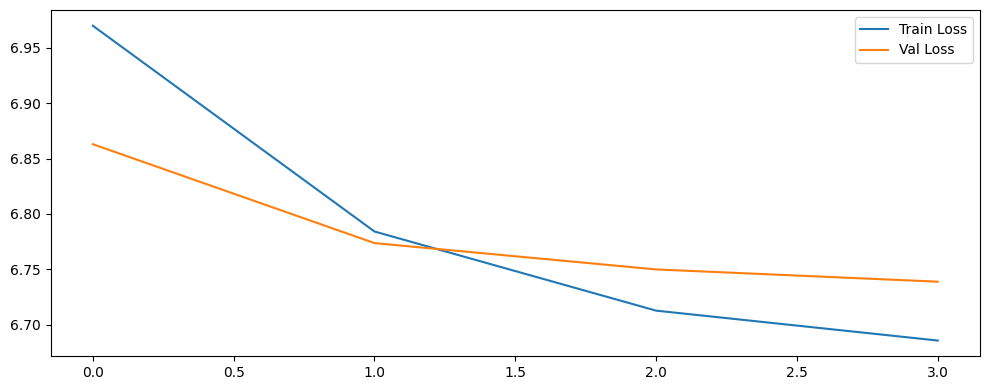

In [ ]:
import matplotlib.pyplot as plt

if not LOAD_MODEL:
    epoch_train_loss = [x[0]['avg_loss'] for x in results]
    epoch_val_loss = [x[1]['avg_loss'] for x in results]

    plt.figure(figsize=(10, 4))
    plt.plot(epoch_train_loss, label='Train Loss')
    plt.plot(epoch_val_loss, label='Val Loss')

    plt.tight_layout()
    plt.legend()
    plt.show()

## Pepelixity evaluation

<div dir=rtl>



<h3> تعریف Perplexity </h3>



- **فرمول:**  

  $$\text{Perplexity}(P) = 2^{H(P)} \quad \text{where} \quad H(P) = -\frac{1}{N} \sum_{i=1}^{N} \log_2 P(w_i)$$

  

- **تعریف:** Perplexity میزان پیش‌بینی‌پذیری یک توالی از کلمات را اندازه‌گیری می‌کند.



- **معیار در توانایی مدل:** هر چه perplexity کمتر باشد، مدل بهتر می‌تواند کلمات را پیش‌بینی کند.

- **استفاده در مدل‌های زبان:** معمولاً در ارزیابی و مقایسه مدل‌های مختلف مانند RNN، LSTM و Transformer به کار می‌رود.



</div>


In [ ]:
def perplexity(model, dataloader, samples=15):
    model.eval()

    def perplexity_fn(probabilities):
        n = len(probabilities)
        entropy = -torch.sum(torch.log2(probabilities)) / n
        perplexity = 2 ** entropy
        return perplexity

    for sample in dataloader.dataset:
        inputs, target = sample
        inputs = torch.hstack((inputs, target))
        text_ids = inputs.to(device)
        probs = []
        for i in range(1, len(text_ids)):
            outputs = model(text_ids[None,:i])
            probs.append(outputs[0, text_ids[i]])

        probs = torch.stack(probs)
        sample_perp = perplexity_fn(probs)

        if not(sample_perp < torch.inf):
            sample_perp = '+∞'

        print(f'{tokenizer.ids_to_tokens(inputs.tolist())} ----> perplexity: {sample_perp}')
        samples -= 1

        inputs = inputs.cpu()
        del inputs

        if samples <= 0: break


perplexity(model, test_loader)

['و', 'توابع', 'آن'] ----> perplexity: +∞
['تنها', 'در', 'نوشته'] ----> perplexity: +∞
['باید', 'به', 'عنوان'] ----> perplexity: +∞
['تعصبات', 'مذهبی', 'در'] ----> perplexity: +∞
['چگونه', 'سبب', 'درخشش'] ----> perplexity: +∞
['قتل', 'امیرکبیر', 'و'] ----> perplexity: +∞
['پنجوین', 'شهرستان', 'سلیمانیه'] ----> perplexity: +∞
['کرده_است', '.'] ----> perplexity: +∞
['تفنگ', 'است', 'که'] ----> perplexity: +∞
['.', 'هم', 'چنین'] ----> perplexity: +∞
['مخالفان', 'خود', 'و'] ----> perplexity: +∞
['با', 'این', 'همه'] ----> perplexity: +∞
['هستند', 'که', 'ترودو'] ----> perplexity: +∞
['فیده', 'در', 'نوامبر'] ----> perplexity: +∞
['نیروی', 'دریایی', 'روسیه'] ----> perplexity: +∞


## Text Generation

In [ ]:
def generate(start_text, max_len=100):
    start_text_tokens = tokenizer.tokenize(start_text)
    start_text_ids = tokenizer.tokens_to_ids(start_text_tokens)
    start_text_ids = torch.tensor(start_text_ids[:-1], device=device) # remove EOS and create Tensor

    result = start_text_ids

    while result[-1] != tokenizer.EOS and len(result) < max_len:
      outputs = model(result[None,-n_gram:])
      result = torch.hstack((result, outputs.argmax(dim=1)))

    return tokenizer.ids_to_tokens(result.tolist())


result = generate('',  max_len=50)
' '.join(result)

'اساس مقاله در سال و این سال آن ها را از سال خود ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها'

In [ ]:
result = generate('گل',  max_len=50)
' '.join(result)

'گل های در کشور به کشور به شهر و این سال آن ها را از سال خود ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها'

In [ ]:
result = generate('کتاب بسیار عالی',  max_len=50)
' '.join(result)

'کتاب بسیار عالی را از سال خود ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها ها'

# Transformer Language Model (TLM)

## Prepare dataset

In [ ]:
import torch

MAX_LEN = 500
MAX_DATA = 15000
token_ids = []

for sent_tokens in tokenized_sentences:
    token_ids.append(tokenizer.tokens_to_ids(sent_tokens, truncate_size=MAX_LEN))
    if len(token_ids) >= MAX_DATA:
        break

token_ids = torch.tensor(token_ids)

print(token_ids.shape)

torch.Size([15000, 500])


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(token_ids)
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.85, 0.1, 0.05])

print(f'train_dataset: {len(train_dataset)}')
print(f'val_dataset  : {len(val_dataset)}')
print(f'test_dataset : {len(test_dataset)}')

# Define the DataLoader for each set
batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_dataset: 12750
val_dataset  : 1500
test_dataset : 750


## Model implementation

<Axes: >

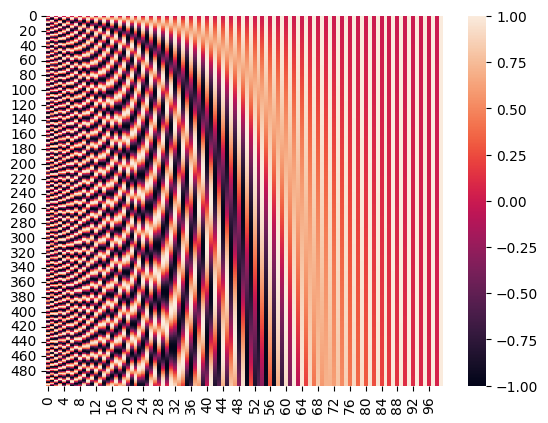

In [ ]:
import torch
import torch.nn as nn
import seaborn as sns


def sinusoidal_positional_embedding(L:'token_sequence_size', H:'token_embedding_dim', device, n=10000.0):
    assert H % 2 == 0, "Sinusoidal positional embedding cannot apply to odd token embedding dim"

    positions = torch.arange(0, L).unsqueeze_(1)
    embeddings = torch.zeros(L, H)

    denominators = torch.pow(n, 2*torch.arange(0, H//2)/H) # 10000^(2i/d_model), i is the index of embedding
    embeddings[:, 0::2] = torch.sin(positions/denominators) # sin(pos/10000^(2i/d_model))
    embeddings[:, 1::2] = torch.cos(positions/denominators) # cos(pos/10000^(2i/d_model))
    return embeddings.to(device)


# Decoder block with Attention and causal masking
class DecoderBlock(nn.Module):
    def __init__(self, hidden_size=128, num_heads=4):
        super(DecoderBlock, self).__init__()
        self.norm1 = nn.LayerNorm(hidden_size)
        self.norm2 = nn.LayerNorm(hidden_size)
        self.multihead_attn = nn.MultiheadAttention(
            hidden_size,
            num_heads=num_heads,
            batch_first=True,
            dropout=0.1,
        )
        self.feed_forward = nn.Sequential(
            nn.Linear(hidden_size, hidden_size * 4),
            nn.ELU(),
            nn.Linear(hidden_size * 4, hidden_size)
        )

    def forward(self, x, padding_mask):
        B, L, H = x.shape
        causal_mask = torch.triu(torch.ones(L, L, device=device), 1).bool()
        att_x = self.multihead_attn(x, x, x, attn_mask=causal_mask, key_padding_mask=padding_mask)[0]
        x = self.norm1(att_x + x)
        ff_x = self.feed_forward(x)
        out = self.norm2(ff_x + x)
        return out


class Transformer_LM(nn.Module):
    def __init__(self, vocab_size, hidden_size=128, num_layers=3, num_heads=4):
        super(Transformer_LM, self).__init__()
        self.num_heads = num_heads
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(vocab_size, hidden_size)
        self.blocks = nn.ModuleList([
            DecoderBlock(hidden_size, num_heads) for _ in range(num_layers)
        ])
        # Projection layer
        self.fc_out = nn.Linear(hidden_size, vocab_size)


    def name(self):
        return f'TRANSFORMER_model_HS{self.hidden_size}_NH{self.num_heads}_NL{self.num_layers}'


    def forward(self, input_seq):
        padding_mask = input_seq == tokenizer.PAD

        input_embs = self.embedding(input_seq)
        N, L, H = input_embs.shape

        # Add positional embeddings to token embeddings
        pos_emb = sinusoidal_positional_embedding(L, H, input_seq.device)
        embs = input_embs + pos_emb

        for block in self.blocks:
            embs = block(embs, padding_mask)

        return self.fc_out(embs)


sns.heatmap(sinusoidal_positional_embedding(500, 100, 'cpu'))

## Model Training

In [ ]:
from torchinfo import summary
n_epochs = 4
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vocab_size = tokenizer.get_vocab_size()

model = Transformer_LM(vocab_size, hidden_size=256, num_layers=6, num_heads=4)
model= model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.05)
criterion = nn.CrossEntropyLoss()

print(summary(model))

Layer (type:depth-idx)                                       Param #
Transformer_LM                                               --
├─Embedding: 1-1                                             44,333,056
├─ModuleList: 1-2                                            --
│    └─DecoderBlock: 2-1                                     --
│    │    └─LayerNorm: 3-1                                   512
│    │    └─LayerNorm: 3-2                                   512
│    │    └─MultiheadAttention: 3-3                          263,168
│    │    └─Sequential: 3-4                                  525,568
│    └─DecoderBlock: 2-2                                     --
│    │    └─LayerNorm: 3-5                                   512
│    │    └─LayerNorm: 3-6                                   512
│    │    └─MultiheadAttention: 3-7                          263,168
│    │    └─Sequential: 3-8                                  525,568
│    └─DecoderBlock: 2-3                                     --
│  

In [ ]:
LOAD_MODEL = False


def train_epoch(model, dataloader, criterion, optimizer, device, bar_desc='Training', display_bar=True):
    model.train()
    if display_bar:
        bar = tqdm(total=len(dataloader), desc=bar_desc, postfix='', leave=True, position=0)

    sum_loss = 0
    all_losses = []
    for batch_i, (inputs,) in enumerate(dataloader):
        inputs = inputs.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        targets = inputs[:, 1:] # pick shifted input as target
        outputs = outputs[:, :-1, :] # ignore the last token in output

        targets = targets.reshape(-1)
        outputs = outputs.reshape(-1, outputs.shape[-1])

        non_pad_idices = torch.where(targets != tokenizer.PAD)[0]
        targets = targets[non_pad_idices]
        outputs = outputs[non_pad_idices]

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        sum_loss += loss.item()
        all_losses.append(loss.item())

        if display_bar:
            avg_loss = sum_loss / (batch_i+1)
            bar.set_postfix_str(f'batch-loss:{loss.item():.5f}, avg-loss:{avg_loss:.5f}')
            bar.update(1)

        inputs = inputs.cpu()
        outputs = outputs.cpu()
        targets = targets.cpu()
        del inputs, outputs, targets

    if display_bar: del bar

    avg_loss = sum_loss / len(dataloader)
    return  {'avg_loss' : avg_loss,'all-losses': all_losses}



def val_epoch(model, dataloader, criterion, device, bar_desc='Validating', display_bar=True):
    model.train()
    if display_bar:
        bar = tqdm(total=len(dataloader), desc=bar_desc, postfix='', leave=True, position=0)

    sum_loss = 0
    all_losses = []
    for batch_i, (inputs,) in enumerate(dataloader):
        inputs = inputs.to(device)
        outputs = model(inputs)

        targets = inputs[:, 1:] # pick shifted input as target
        outputs = outputs[:, :-1, :] # ignore the last token in output

        targets = targets.reshape(-1)
        outputs = outputs.reshape(-1, outputs.shape[-1])

        non_pad_idices = torch.where(targets != tokenizer.PAD)[0]
        targets = targets[non_pad_idices]
        outputs = outputs[non_pad_idices]

        loss = criterion(outputs, targets).item()

        sum_loss += loss
        all_losses.append(loss)

        if display_bar:
            avg_loss = sum_loss / (batch_i+1)
            bar.set_postfix_str(f'batch-loss:{loss:.5f}, avg-loss:{avg_loss:.5f}')
            bar.update(1)

        inputs = inputs.cpu()
        outputs = outputs.cpu()
        targets = targets.cpu()
        del inputs, outputs, targets

    if display_bar: del bar

    avg_loss = sum_loss / len(dataloader)
    return  {'avg_loss' : avg_loss,'all-losses': all_losses}




if LOAD_MODEL:
    model.load_state_dict(torch.load(model.name() + '.pkl', weights_only=True, map_location=device))
    model.eval()

else:
    results = []
    for epoch in range(n_epochs):
        res_train = train_epoch(model, train_loader, criterion, optimizer, device, bar_desc=f'Training[{epoch+1}/{n_epochs}]')
        res_val = val_epoch(model, val_loader, criterion, device, bar_desc=f'Validate[{epoch+1}/{n_epochs}]')

        print('\n')
        results.append((res_train, res_val))

    torch.save(model.state_dict(), model.name() + '.pkl')

Validate[1/4]: 100%|██████████| 150/150 [01:26<00:00,  1.73it/s, batch-loss:7.38153, avg-loss:7.48059]


Validate[2/4]: 100%|██████████| 150/150 [01:26<00:00,  1.74it/s, batch-loss:7.39944, avg-loss:7.51915]


Validate[3/4]: 100%|██████████| 150/150 [01:26<00:00,  1.73it/s, batch-loss:7.54399, avg-loss:7.65725]


Validate[4/4]: 100%|██████████| 150/150 [01:26<00:00,  1.73it/s, batch-loss:7.50641, avg-loss:7.61070]


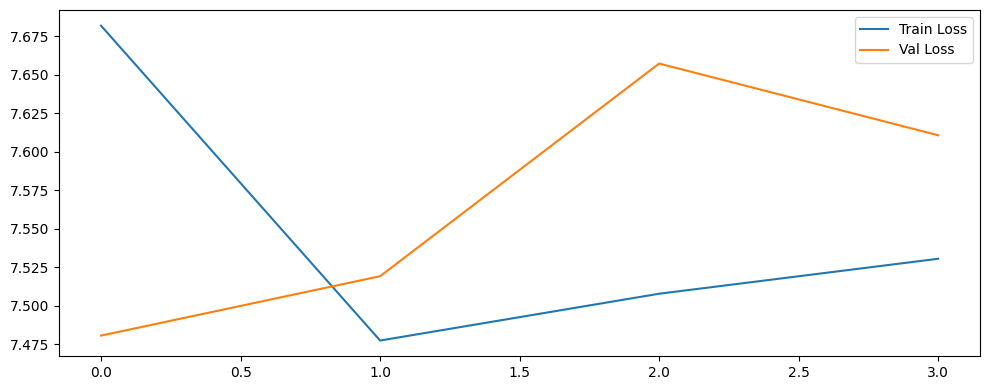

In [ ]:
import matplotlib.pyplot as plt

if not LOAD_MODEL:
    epoch_train_loss = [x[0]['avg_loss'] for x in results]
    epoch_val_loss = [x[1]['avg_loss'] for x in results]

    plt.figure(figsize=(10, 4))
    plt.plot(epoch_train_loss, label='Train Loss')
    plt.plot(epoch_val_loss, label='Val Loss')

    plt.tight_layout()
    plt.legend()
    plt.show()

## Text Generation

In [ ]:
def generate(start_text, max_len=100):
    start_text_tokens = tokenizer.tokenize(start_text)
    start_text_ids = tokenizer.tokens_to_ids(start_text_tokens)
    start_text_ids = torch.tensor(start_text_ids[:-1], device=device) # remove EOS

    result = start_text_ids

    while result[-1] != tokenizer.EOS and len(result) < max_len:
        if len(result) < MAX_LEN:
            pads = torch.tensor([tokenizer.PAD]*(MAX_LEN - len(result)), device=device)
            inputs = torch.hstack((result,pads))
            target_idx = len(result)-1
        else:
            inputs = result[-MAX_LEN:]
            target_idx = MAX_LEN-1

        outputs = model(inputs[None, :])
        output = outputs[:, target_idx].argmax(dim=1)
        result = torch.hstack((result, output))

    return tokenizer.ids_to_tokens(result.tolist())


result = generate('',  max_len=10)
' '.join([])

'عنوان مقاله از مجله کتاب که به صورت رسمی محتوا '

In [ ]:
result = generate('گل',  max_len=10)
' '.join(result)

'گل و گیاهان استان محل از از کار و است '

In [ ]:
result = generate('کتاب بسیار عالی',  max_len=10)
' '.join(result)

'کتاب بسیار عالی گذشت از مجموعه سال ها سال ها'